In [10]:
import cv2
import numpy as np
from scipy.io.wavfile import write

# Image: Vertical line in center
def generate_vertical_line(size=256):
    img = np.zeros((size, size), dtype=np.uint8)
    img[:, size//2] = 255
    cv2.imwrite('vertical_line.png', img)
# Audio: High-frequency burst
def generate_burst(fs=44100, duration=2, freq=3000):
    t = np.linspace(0, duration, int(fs * duration))
    y = np.zeros_like(t)
    y[:fs//5] = 0.5 * np.sin(2 * np.pi * freq * t[:fs//5])
    write('burst.wav', fs, (y * 32767).astype(np.int16))

generate_vertical_line()
generate_burst()

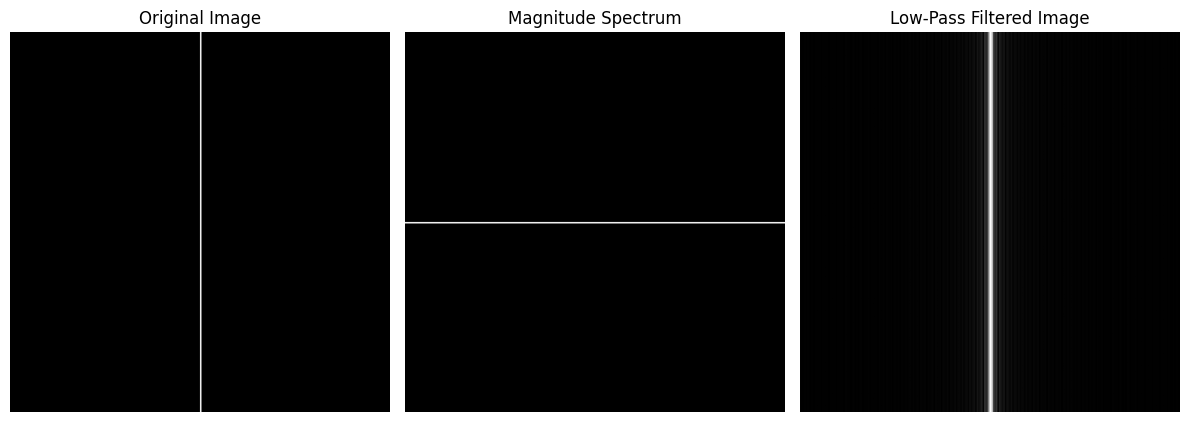

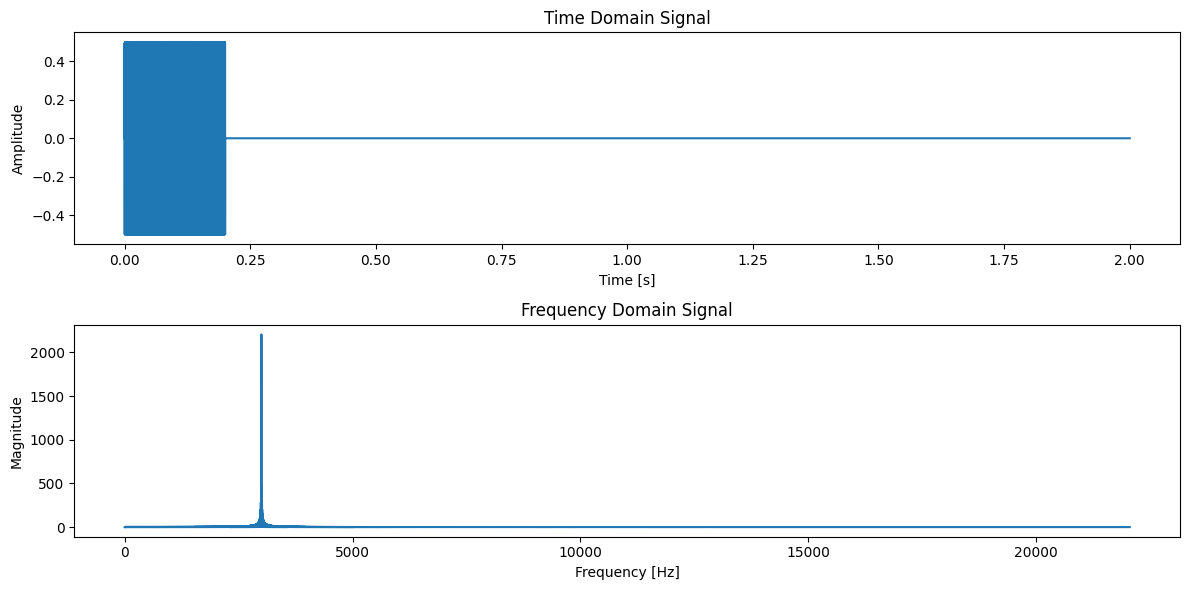

In [3]:
import cv2
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

# 1. Generate the specified grayscale image (vertical line in the center)
def generate_vertical_line(size=256):
    img = np.zeros((size, size), dtype=np.uint8)  # Create a black image
    img[:, size // 2] = 255  # Draw a vertical white line in the center
    cv2.imwrite('vertical_line.png', img)  # Save the image
    return img

# 2. Generate the specified audio signal (high-frequency sine burst with silence)
def generate_burst(fs=44100, duration=2, freq=3000):
    t = np.linspace(0, duration, int(fs * duration))  # Time vector
    y = np.zeros_like(t)  # Initialize the signal with silence
    y[:fs // 5] = 0.5 * np.sin(2 * np.pi * freq * t[:fs // 5])  # Add a sine burst for the first 1/5th of the duration
    write('burst.wav', fs, (y * 32767).astype(np.int16))  # Save the audio
    return t, y

# 3. Perform Fourier transform and filtering on the image
def analyze_image(img):
    # Compute 2D Fourier Transform
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)  # Shift zero frequency to the center
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Compute magnitude spectrum

    # Create a low-pass filter mask
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    r = 50  # Radius of the low-pass filter
    cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)

    # Apply the mask and inverse Fourier Transform
    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_filtered)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_filtered, cmap='gray')
    plt.title('Low-Pass Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 4. Perform Fourier transform and visualization on the audio
def analyze_audio(t, y, fs):
    # Compute Fourier Transform
    Y = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(Y), 1 / fs)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.title('Time Domain Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.plot(freqs[:len(freqs) // 2], np.abs(Y[:len(Y) // 2]))
    plt.title('Frequency Domain Signal')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Generate and analyze the image
    img = generate_vertical_line()
    analyze_image(img)

    # Generate and analyze the audio
    t, y = generate_burst()
    analyze_audio(t, y, fs=44100)
